In [1]:
ls

ASSIGNMENT NEURAL NETWORK .ipynb      TEXT MINING.ipynb
Airlines+Data.xlsx                    Untitled.ipynb
CocaCola_Sales_Rawdata.xlsx           Untitled1.ipynb
FORECASTING  COCACOLA .ipynb          finished assignment/
FORECASTING AIRLINES .ipynb           new neural network.ipynb
FORECASTING.ipynb                     problem statment(Gas turbines).txt
Neural Network Assignment copy.ipynb  unsubmitted assignment/
Problem_statement.txt


In [148]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style("darkgrid")
import numpy as np 
import warnings 
warnings.filterwarnings("ignore")
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.api as sm
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
df=pd.read_excel("Airlines+Data.xlsx")
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [4]:
df.tail()

,Month,Passengers
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


# FEATURE ENGINEERING 

In [7]:
df.rename({'Month':'Date'},axis=1, inplace=True)

In [8]:
df1 = df.copy()
df1.set_index('Date',inplace=True)
df1.index.year

Int64Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
            1995, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            1996, 1996, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
            1997, 1997, 1997, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
            1998, 1998, 1998, 1998, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
            1999, 1999, 1999, 1999, 1999, 2000, 2000, 2000, 2000, 2000, 2000,
            2000, 2000, 2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001,
            2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002,
            2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002],
           dtype='int64', name='Date')

In [9]:
df["Date"] = pd.to_datetime(df.Date,format="%b-%y")
df["month"] = df.Date.dt.strftime("%b") # month extraction
df["year"] = df.Date.dt.strftime("%Y") # year extraction
df.head(10)

,Date,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
5,1995-06-01,135,Jun,1995
6,1995-07-01,148,Jul,1995
7,1995-08-01,148,Aug,1995
8,1995-09-01,136,Sep,1995
9,1995-10-01,119,Oct,1995


# DATA VISUALISATION 

<Axes: xlabel='month', ylabel='year'>

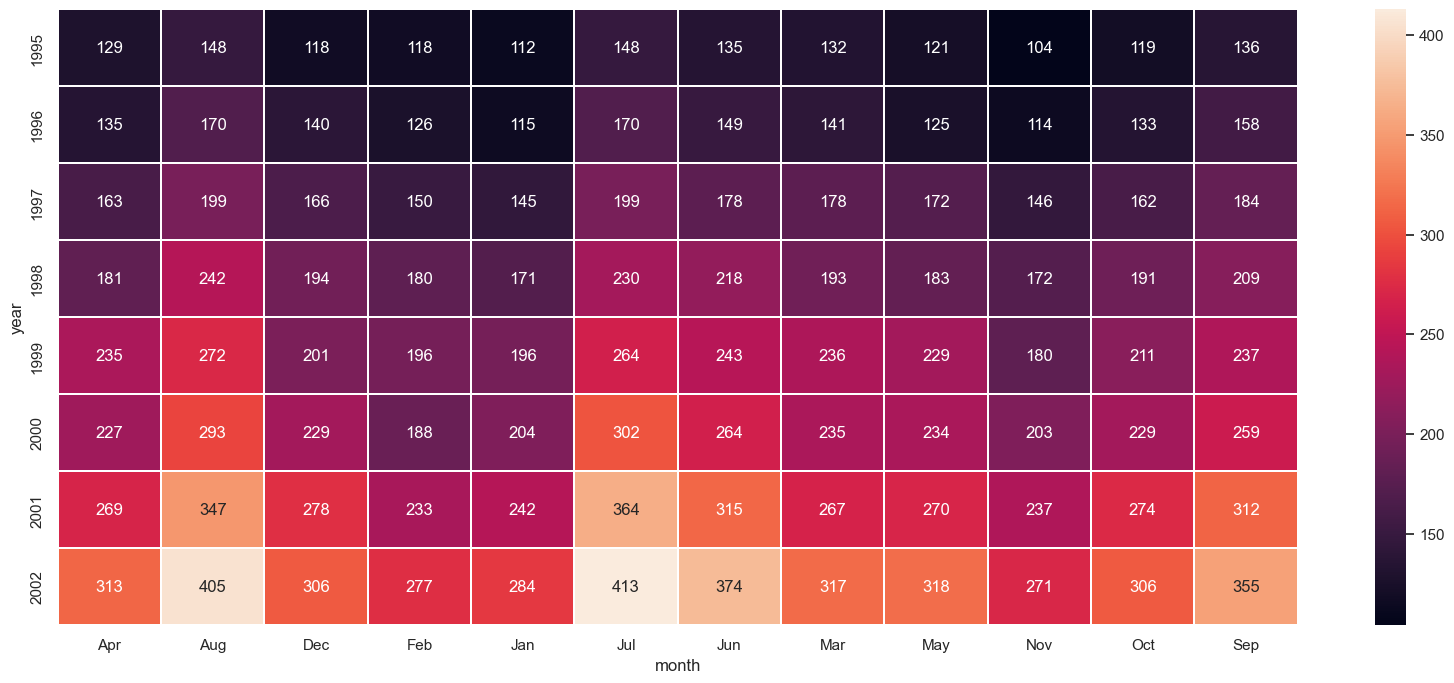

In [20]:
plt.figure(figsize=(20,8))
heatmap_y_month = pd.pivot_table(data=df,values="Passengers",index="year",columns="month",aggfunc="mean")
sns.heatmap(heatmap_y_month,annot=True,fmt="g",linewidths=.01) #fmt is format of the grid values

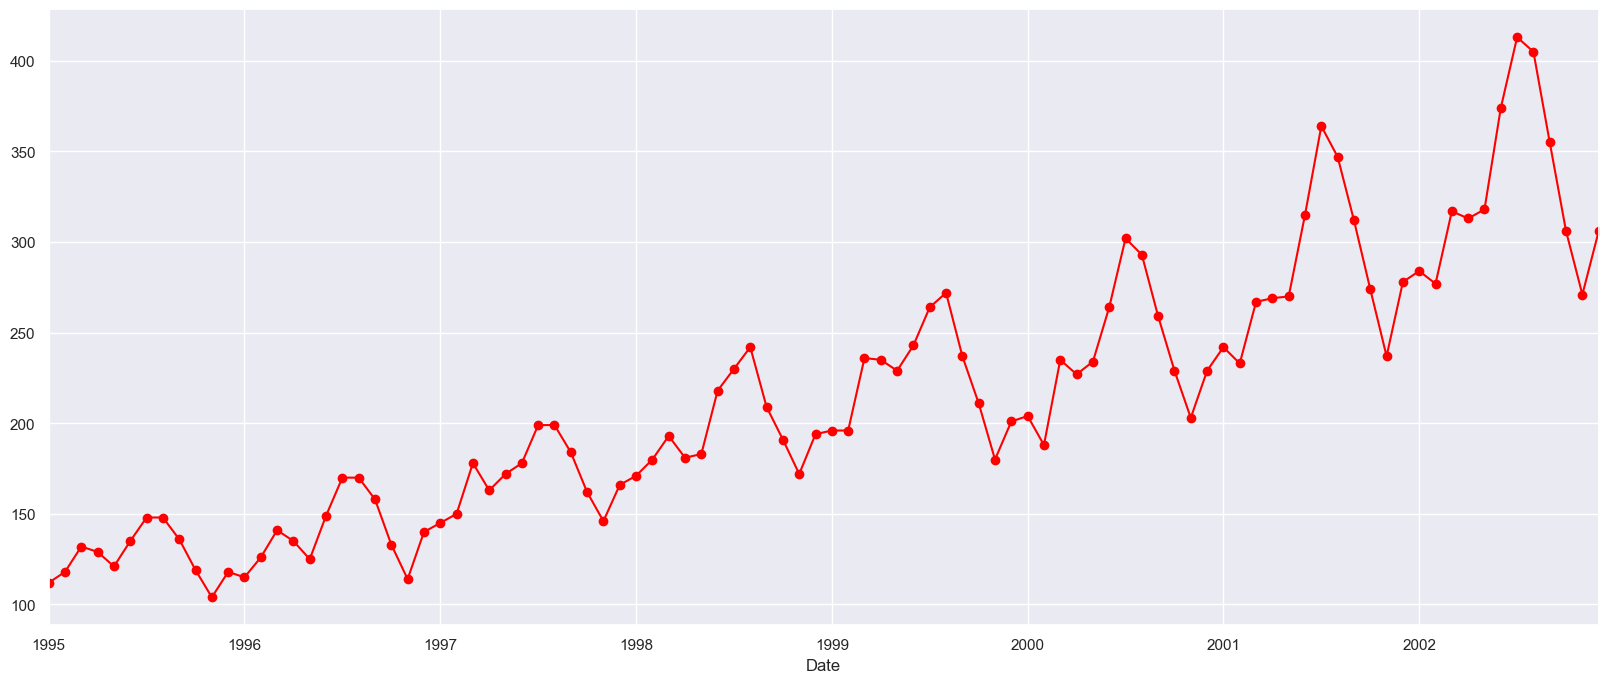

In [21]:
df1['Passengers'].plot(figsize=(20, 8),color='red',marker='o')
plt.show()

<Axes: xlabel='year', ylabel='Passengers'>

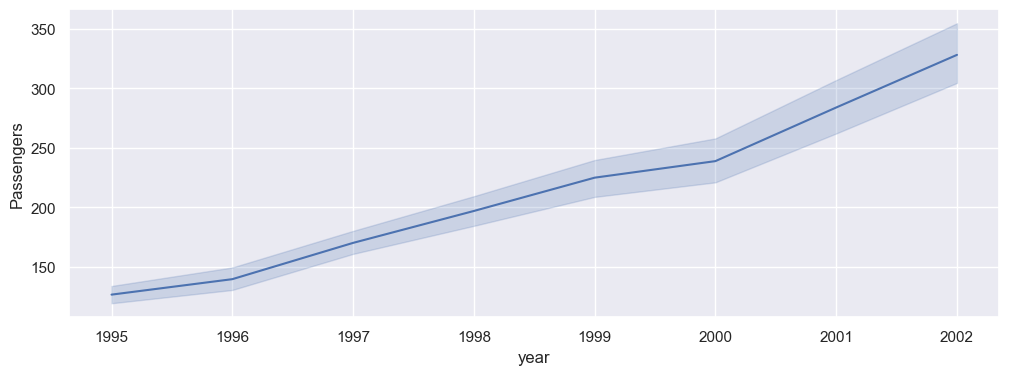

In [22]:
plt.figure(figsize=(12,4))
sns.lineplot(x="year",y="Passengers",data=df)

<Axes: xlabel='month', ylabel='Passengers'>

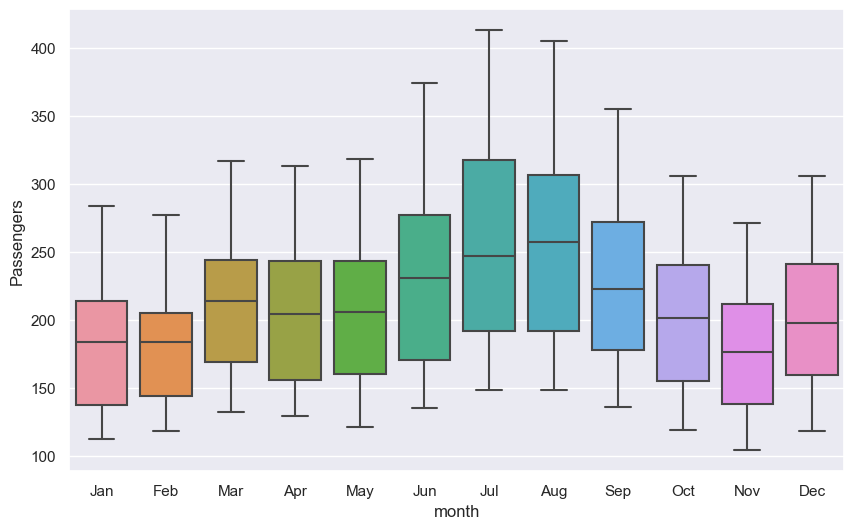

In [74]:
sns.boxplot(x="month",y="Passengers",data=df)

<Axes: xlabel='year', ylabel='Passengers'>

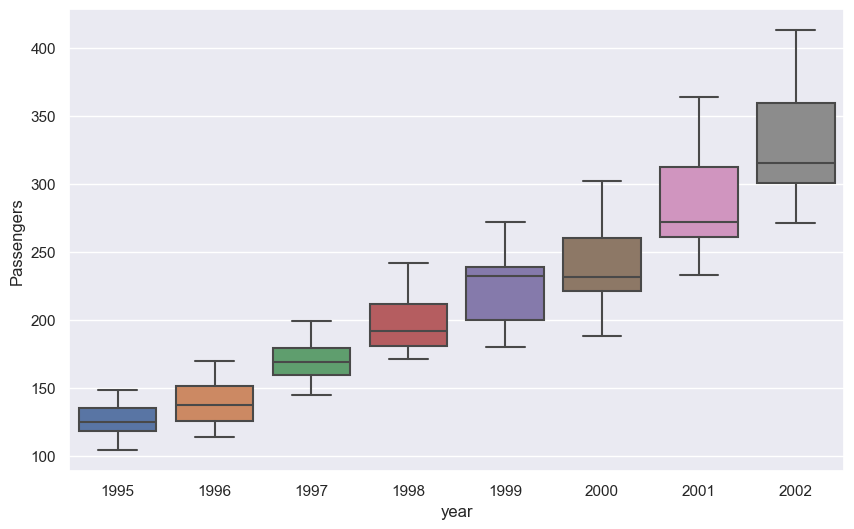

In [76]:
sns.boxplot(x="year",y="Passengers",data=df)

<Axes: >

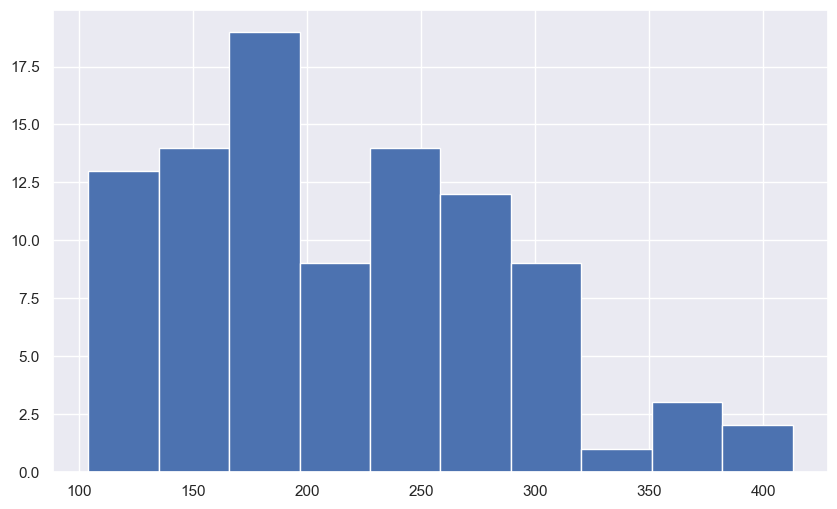

In [27]:
df1.Passengers.hist()

<Axes: ylabel='Density'>

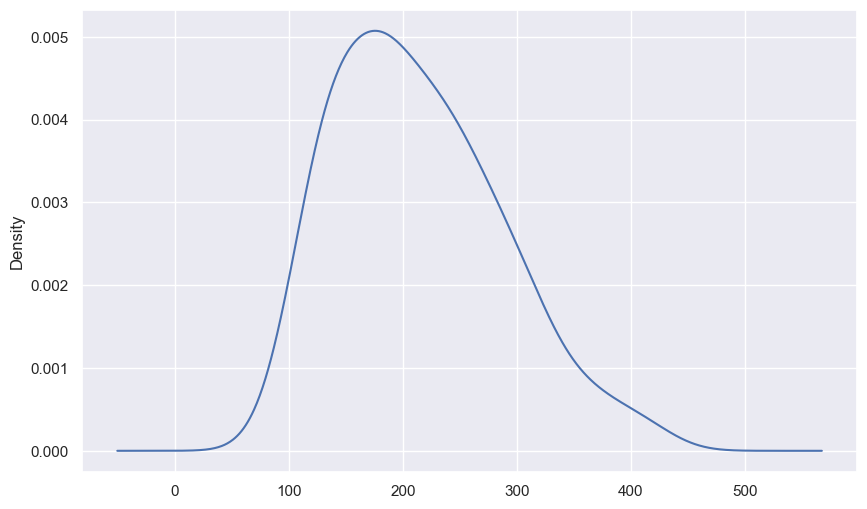

In [29]:
df1.Passengers.plot(kind='kde')

<Axes: xlabel='Date', ylabel='Passengers'>

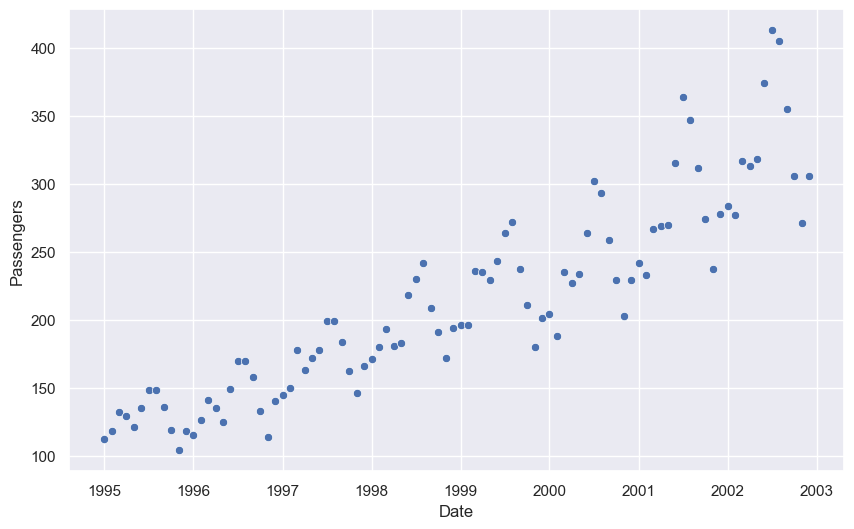

In [32]:
sns.scatterplot(df1.Passengers)

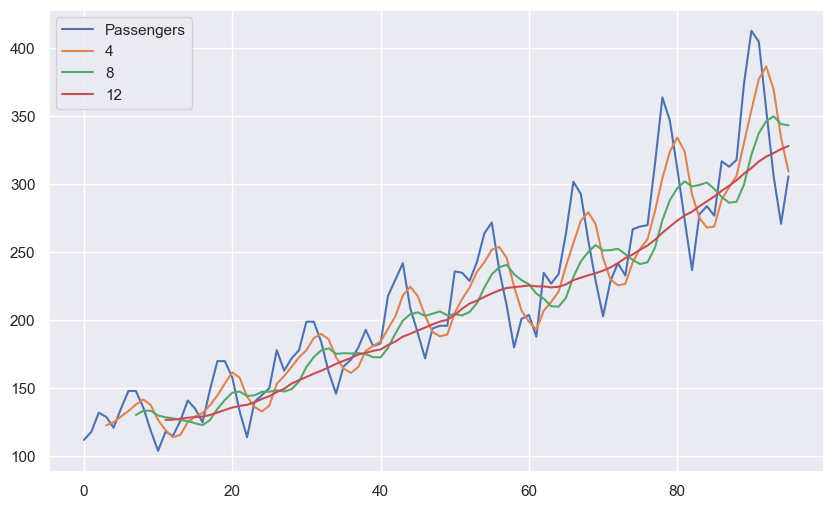

In [43]:
df.Passengers.plot()
for i in range(4,13,4):
    df["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

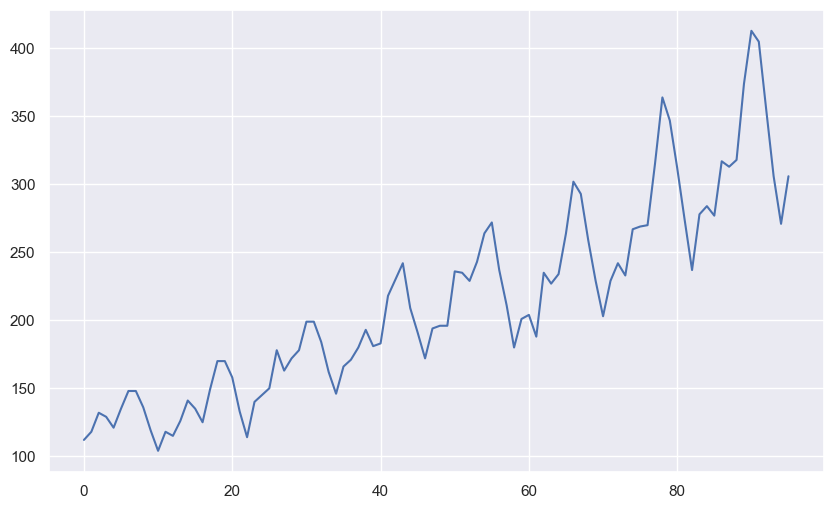

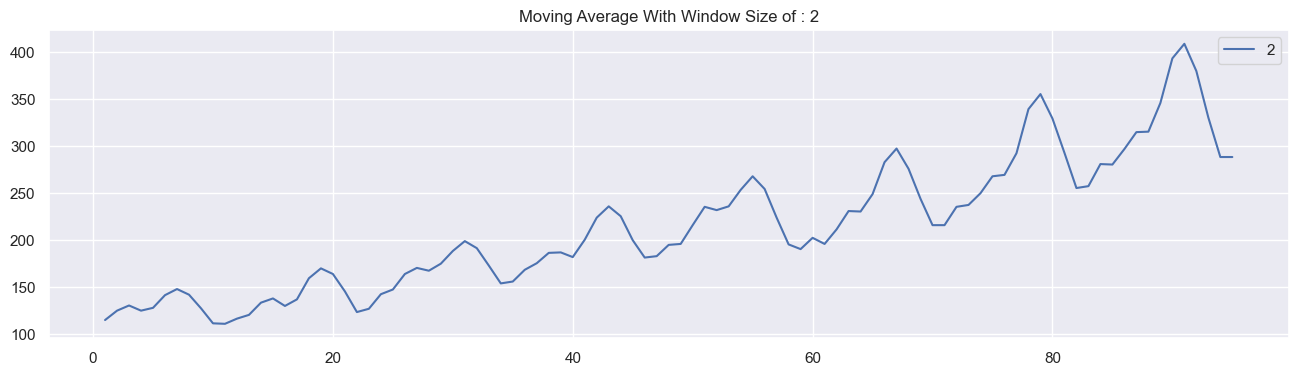

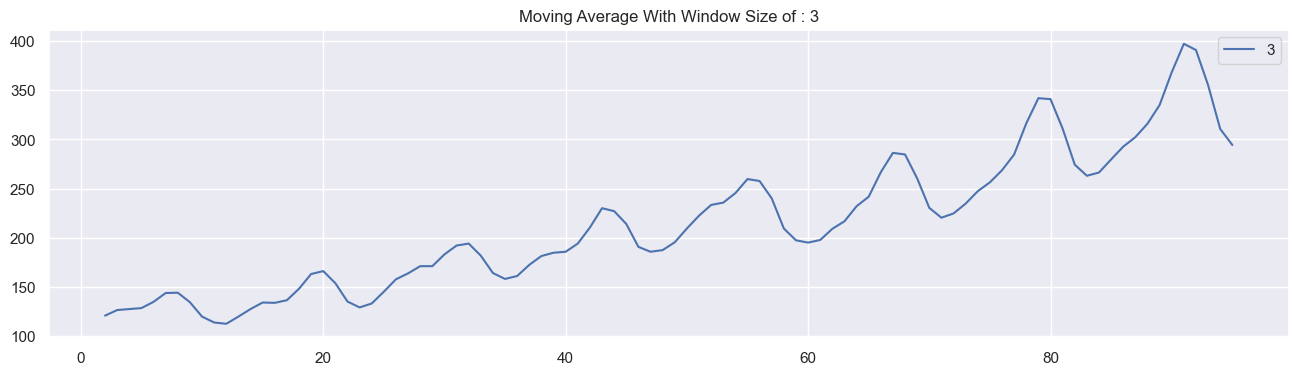

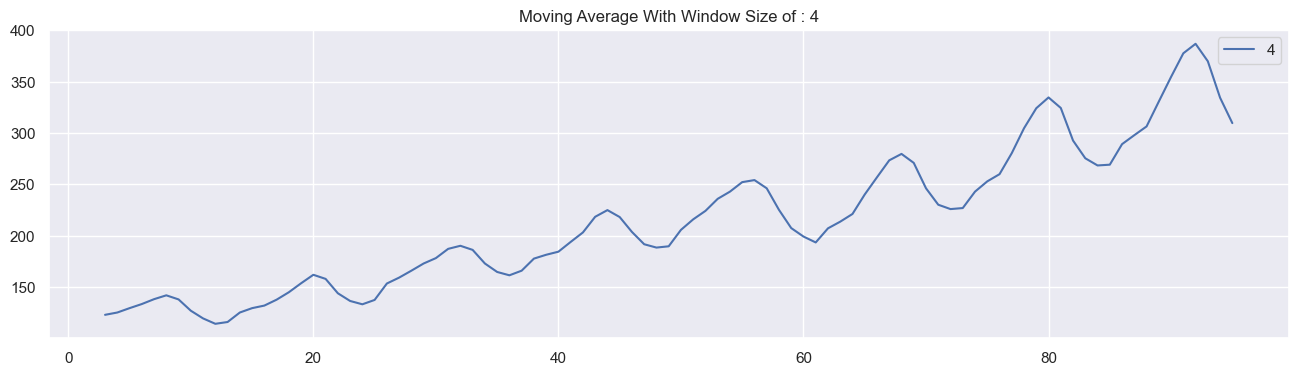

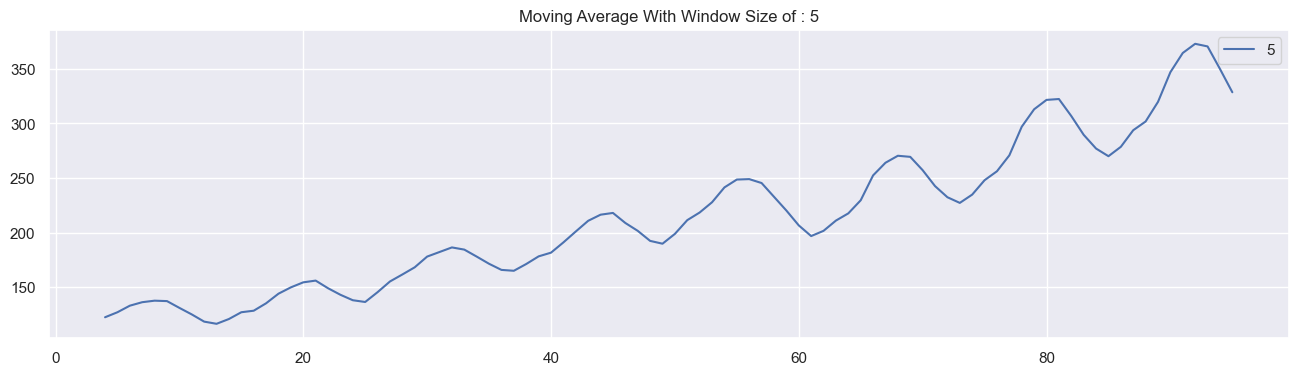

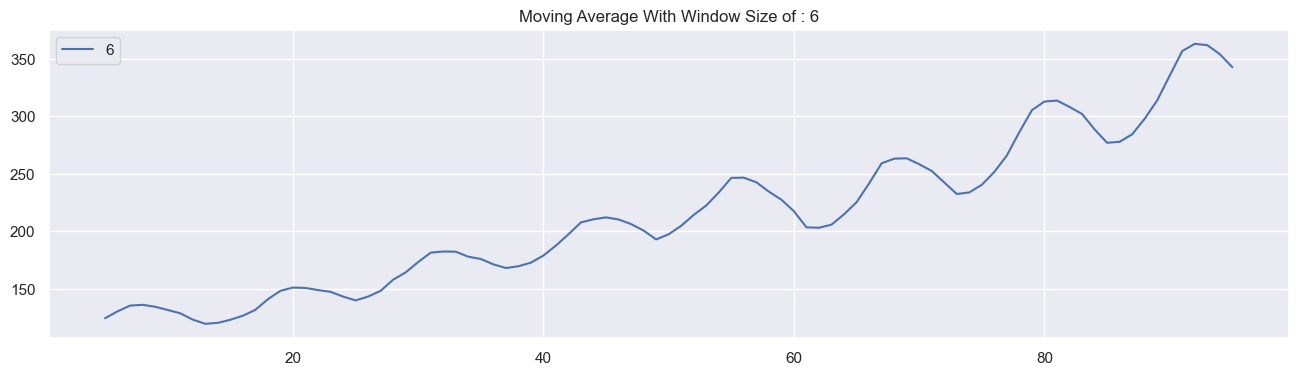

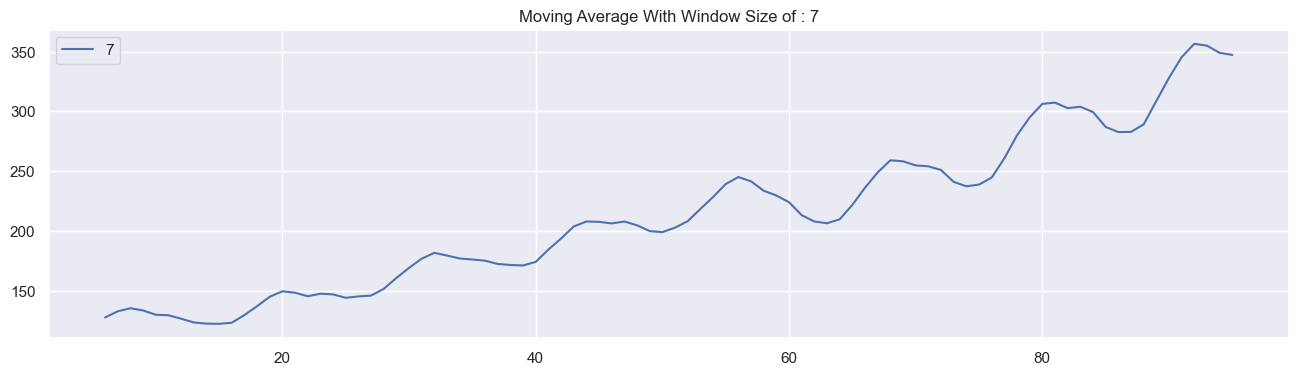

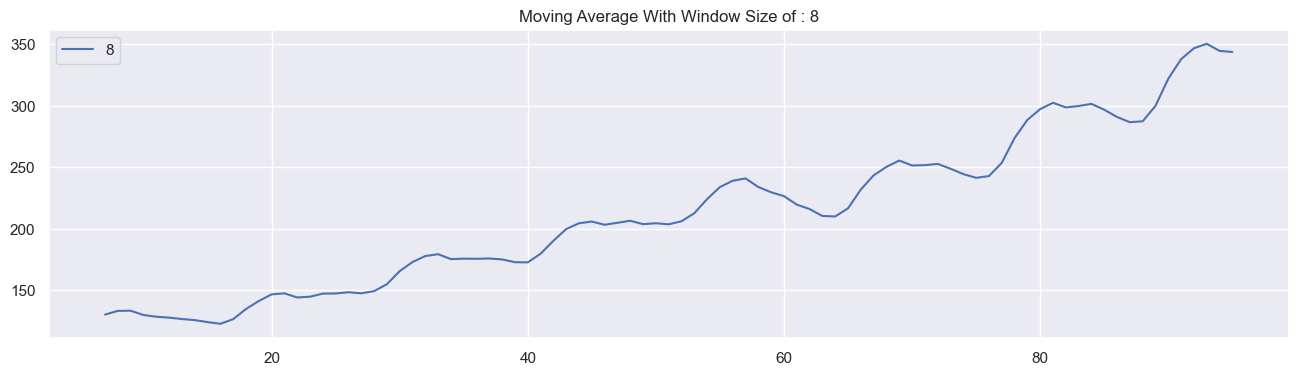

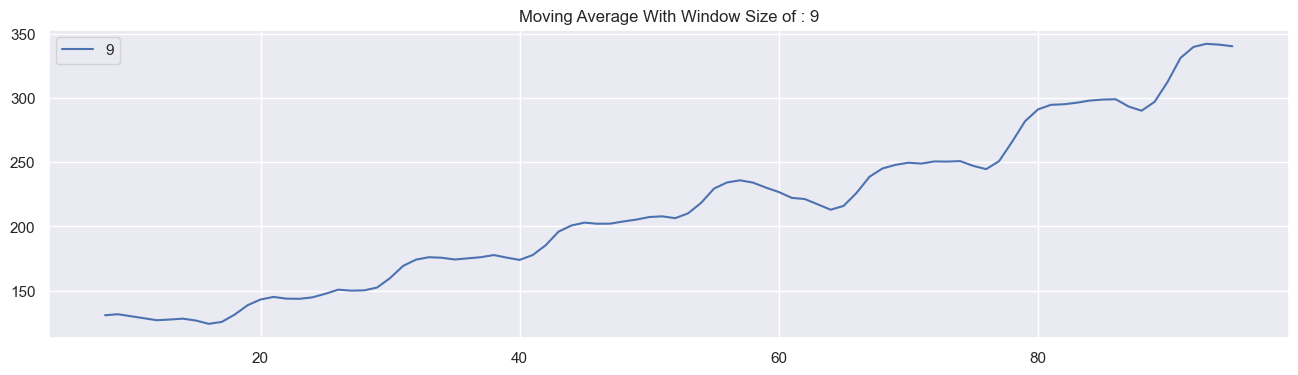

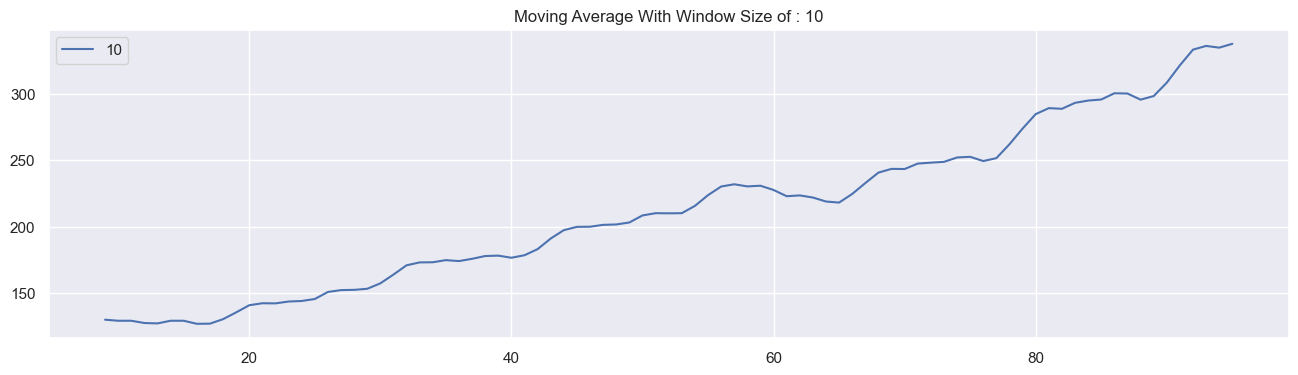

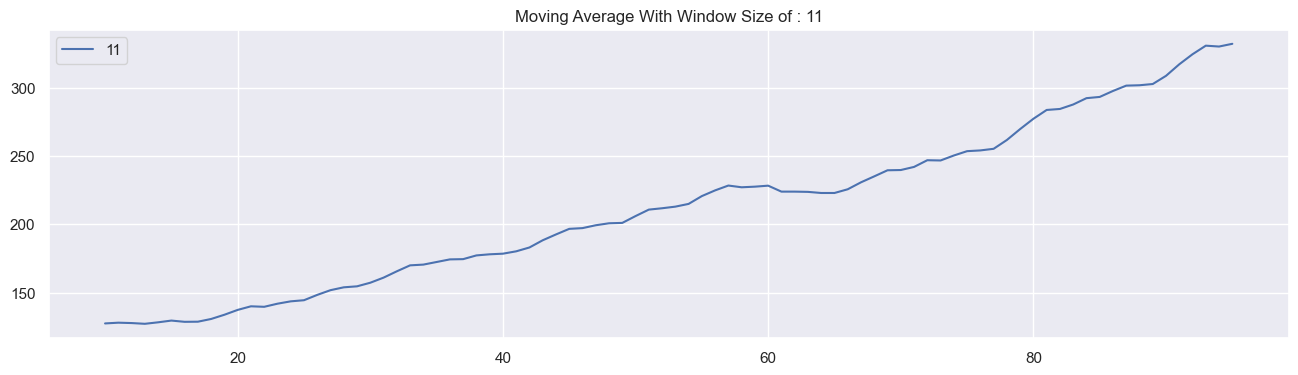

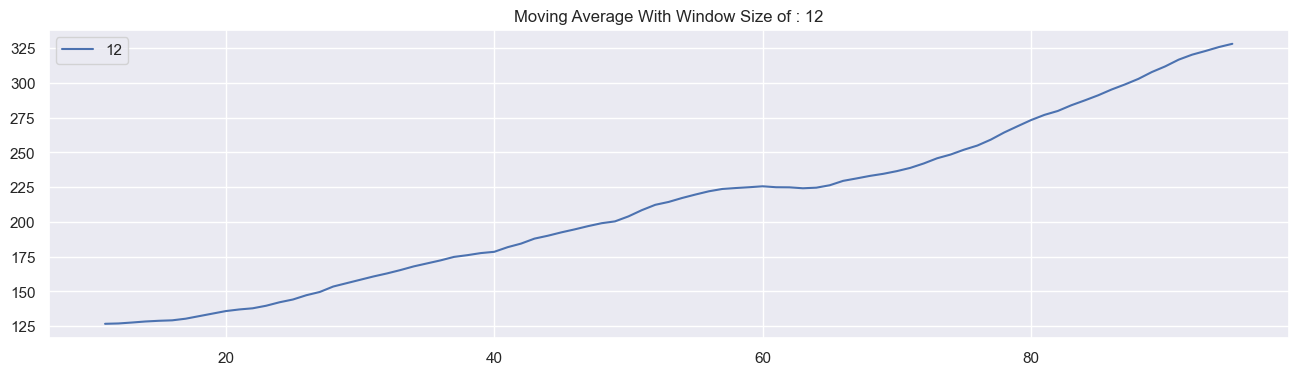

In [66]:

df.Passengers.plot(label="org")
for i in range(2,13):
    plt.figure(figsize=(16,4))
    df["Passengers"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average With Window Size of : "+str(i))
    plt.legend(loc='best')

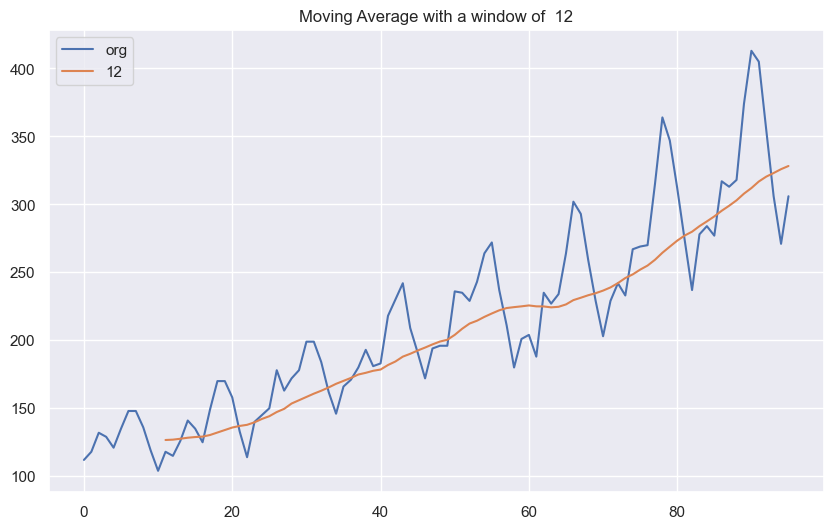

In [65]:
df.Passengers.plot(label="org")
plt.title("Original Series")
df["Passengers"].rolling(12).mean().plot(label=str(12))
plt.title("Moving Average with a window of  "+str(12))
plt.legend(loc='best')

# TIME SERIES DECOMPOSITION PLOT

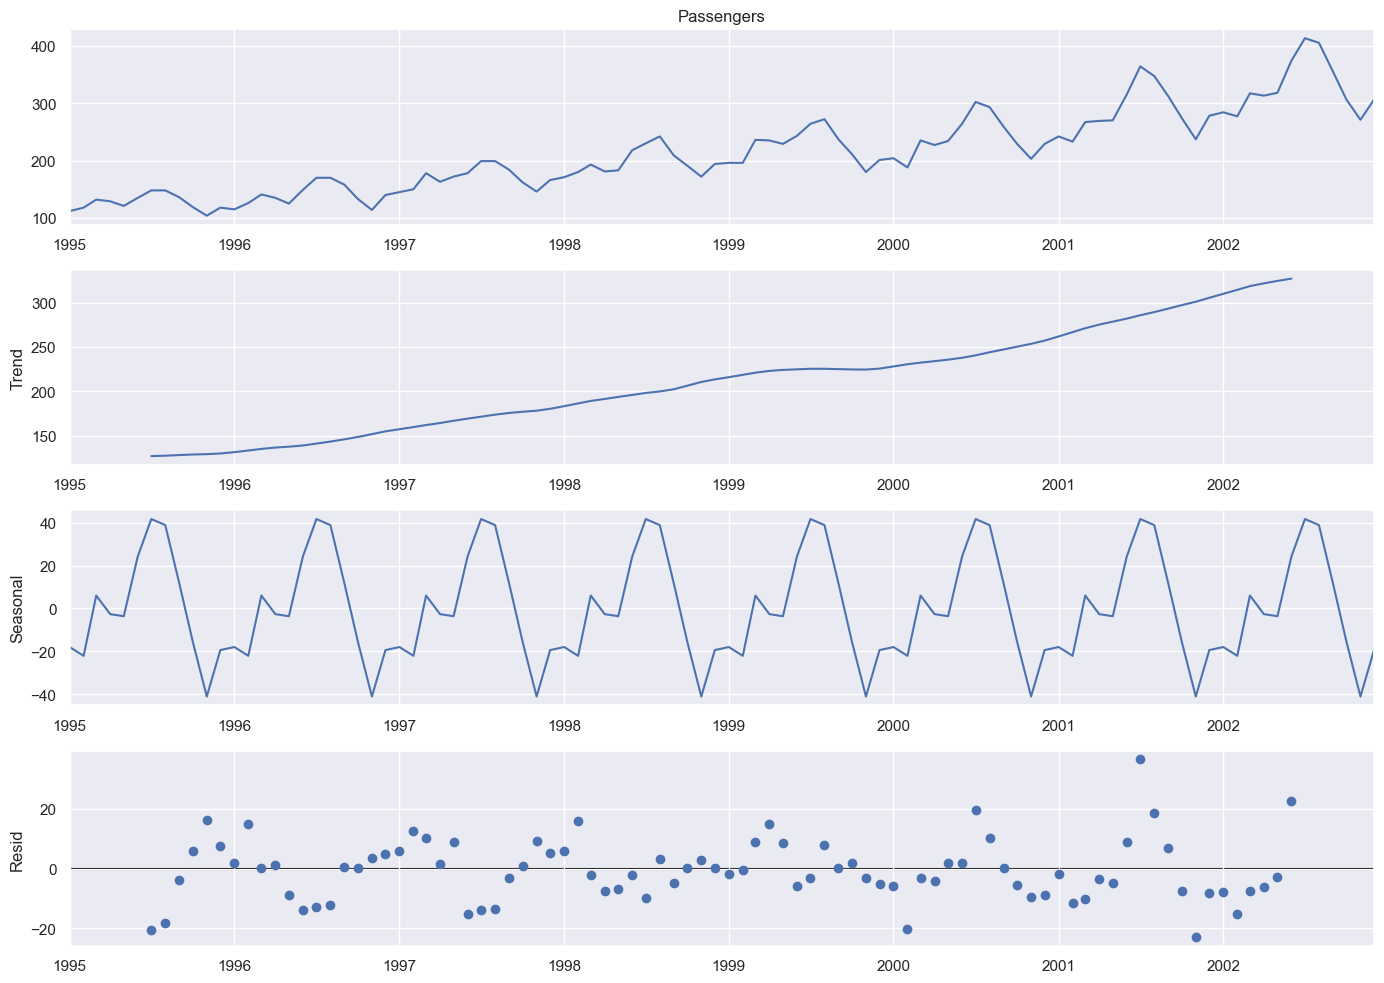

In [53]:
decompose_ts_add = seasonal_decompose(df1.Passengers,period=12)
with plt.rc_context():
    plt.rc("figure", figsize=(14,10))
    decompose_ts_add.plot()
    plt.show()

# Use PACF and ACF plots to determine the appropriate order of the AutoRegressive (AR) and Moving Average (MA)

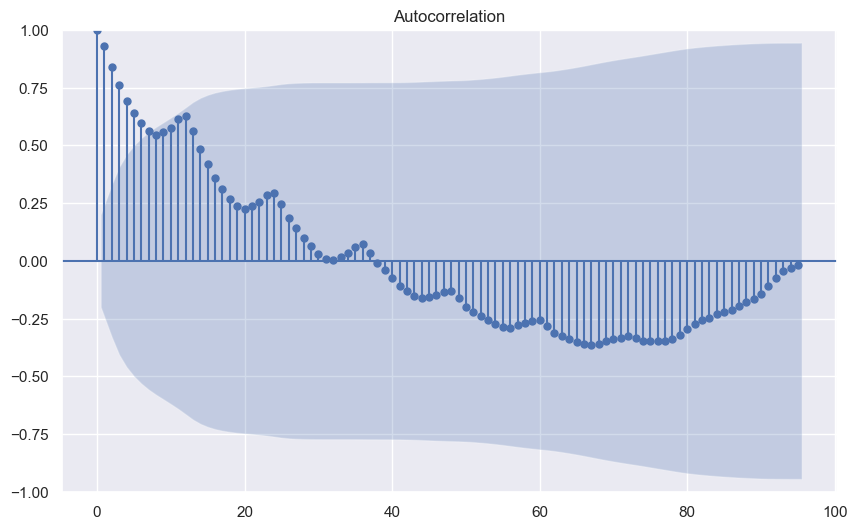

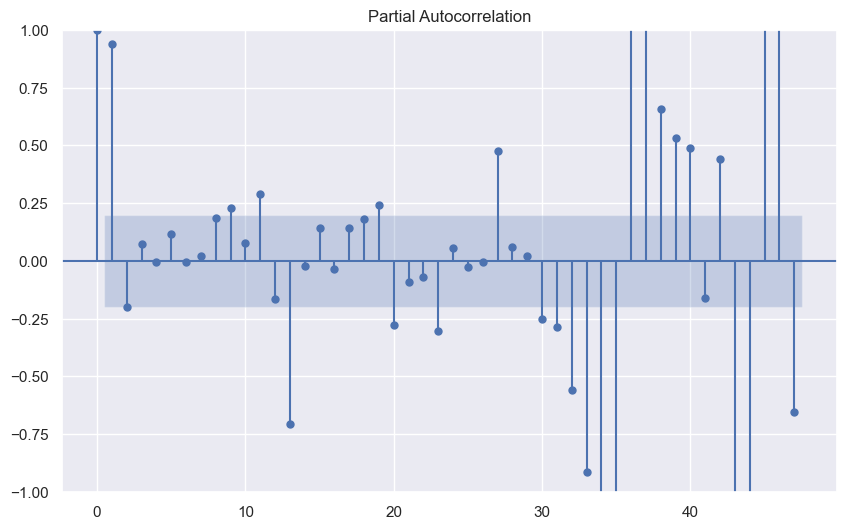

In [63]:
tsa_plots.plot_acf(df.Passengers,lags=95)
tsa_plots.plot_pacf(df.Passengers,lags=47)
plt.show()

<Axes: xlabel='month', ylabel='Passengers'>

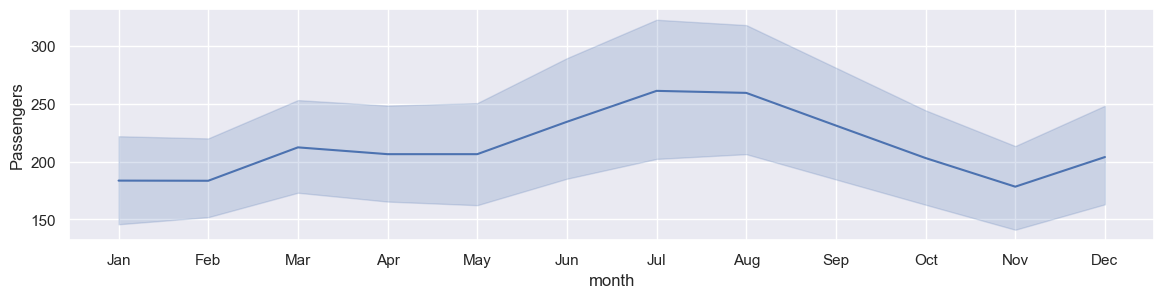

In [69]:
plt.figure(figsize=(14,3))
sns.lineplot(x="month", y="Passengers", data=df)

<Axes: xlabel='year', ylabel='Passengers'>

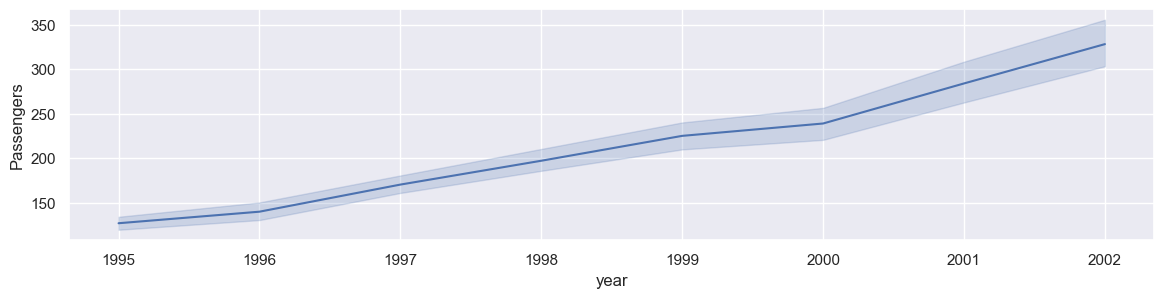

In [70]:
plt.figure(figsize=(14,3))
sns.lineplot(x="year", y="Passengers", data=df)

# Check the stationarity of the time series using the Augmented Dickey-Fuller (ADF) test.

In [108]:
passengers=df1.Passengers

In [109]:
passengers

Date
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

In [110]:
result = sm.tsa.stattools.adfuller(passengers)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: 1.340248
p-value: 0.996825


In [111]:
# First-order differencing
diff_passengers= passengers.diff(periods=1).dropna()

In [112]:
print("The values in this column are computed by subtracting the previous observation from the current observation in the original data. This is a common method for removing trend from a time series data.")
diff_passengers

The values in this column are computed by subtracting the previous observation from the current observation in the original data. This is a common method for removing trend from a time series data.


Date
1995-02-01     6.0
1995-03-01    14.0
1995-04-01    -3.0
1995-05-01    -8.0
1995-06-01    14.0
              ... 
2002-08-01    -8.0
2002-09-01   -50.0
2002-10-01   -49.0
2002-11-01   -35.0
2002-12-01    35.0
Name: Passengers, Length: 95, dtype: float64

<Axes: xlabel='Date'>

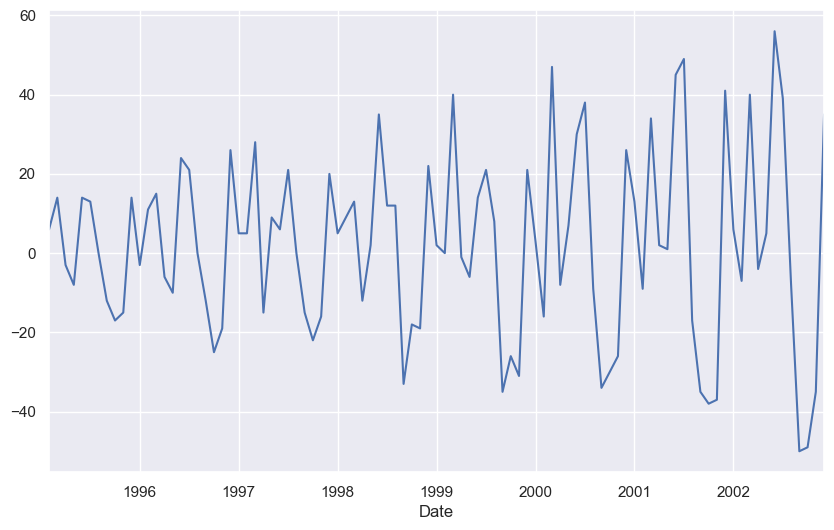

In [113]:
diff_passengers.plot()

In [114]:
result = sm.tsa.stattools.adfuller(diff_passengers)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -2.150002
p-value: 0.224889


the ADF statistic is negative, indicating that the series may be stationary after differencing

# Evaluation Metric MAPE

In [115]:
def MAPE(pred, org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# simple exponential method

In [116]:
ses_model=SimpleExpSmoothing(passengers).fit(smoothing_level=0.2)
pred_ses=ses_model.predict(start=passengers.index[0],end=passengers.index[-1])
MAPE(pred_ses,passengers)

10.914533139126986

In [117]:
passengers.index[0]

Timestamp('1995-01-01 00:00:00')

In [118]:
passengers.index[-1]

Timestamp('2002-12-01 00:00:00')

In [119]:
x=np.linspace(0.1,1,20)
for i in x:
    ses_model = SimpleExpSmoothing(passengers).fit(smoothing_level=i)
    pred_ses = ses_model.predict(start =passengers.index[0],end = passengers.index[-1])
    score=MAPE(pred_ses,passengers)
    print("smoothing_level -- ",i,"-->", " MAPE Error ", score)

smoothing_level --  0.1 -->  MAPE Error  12.023148546368892
smoothing_level --  0.1473684210526316 -->  MAPE Error  11.293546774253903
smoothing_level --  0.19473684210526315 -->  MAPE Error  10.947173991825814
smoothing_level --  0.24210526315789474 -->  MAPE Error  10.69232326981165
smoothing_level --  0.2894736842105263 -->  MAPE Error  10.561176555969137
smoothing_level --  0.33684210526315794 -->  MAPE Error  10.413704093739229
smoothing_level --  0.38421052631578945 -->  MAPE Error  10.242014013443997
smoothing_level --  0.43157894736842106 -->  MAPE Error  10.089386987814253
smoothing_level --  0.4789473684210527 -->  MAPE Error  9.928127834522613
smoothing_level --  0.5263157894736842 -->  MAPE Error  9.808170084226271
smoothing_level --  0.5736842105263158 -->  MAPE Error  9.692800675965037
smoothing_level --  0.6210526315789474 -->  MAPE Error  9.581827637320794
smoothing_level --  0.6684210526315789 -->  MAPE Error  9.456027834418038
smoothing_level --  0.7157894736842105 --

1995-01-01    112.0
1995-02-01    112.0
1995-03-01    118.0
1995-04-01    132.0
1995-05-01    129.0
              ...  
2002-08-01    413.0
2002-09-01    405.0
2002-10-01    355.0
2002-11-01    306.0
2002-12-01    271.0
Freq: MS, Length: 96, dtype: float64


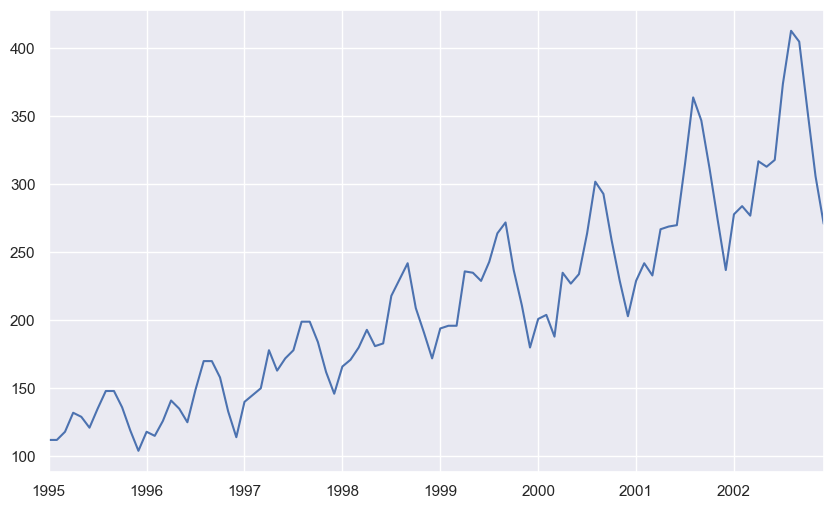

In [120]:
pred_ses.plot()
print(pred_ses)

# Holts  Winters method


In [121]:
hw_model= Holt(passengers).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start=passengers.index[0],end =passengers.index[-1])
MAPE (pred_hw,passengers)

9.89703284684574

1995-01-01    113.275388
1995-02-01    115.257492
1995-03-01    120.892714
1995-04-01    134.996924
1995-05-01    134.458258
                 ...    
2002-08-01    424.794924
2002-09-01    424.772861
2002-10-01    373.604791
2002-11-01    313.354410
2002-12-01    266.527628
Freq: MS, Length: 96, dtype: float64


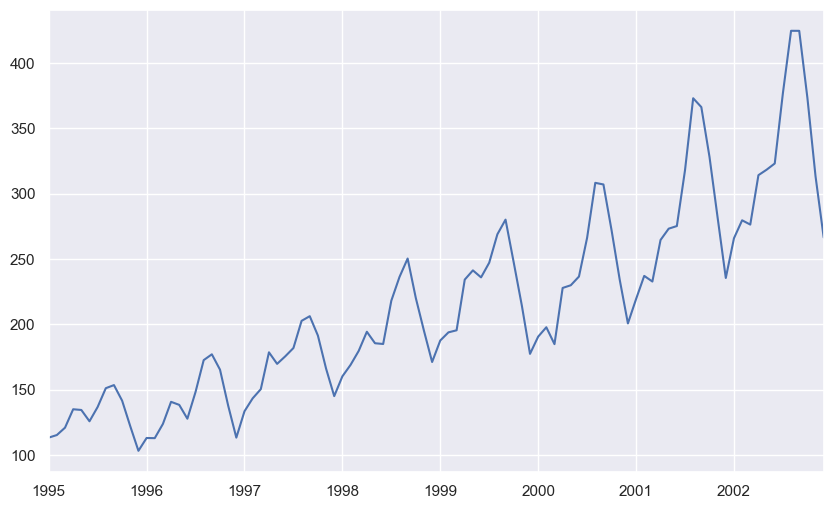

In [122]:
pred_hw.plot()
print(pred_hw)

In [123]:
alphas=np.arange (0.1,1,0.9/10)
betas=np.arange (0.1,1,0.9/10)
l=[]
for i in alphas :
    for j in betas:
        
        hw_model = Holt(passengers).fit(smoothing_level=i, smoothing_slope=j)
        pred_hw = hw_model.predict(start = passengers.index [0],end = passengers.index [-1])
        score=MAPE(pred_hw,passengers) 
        print("smoothing_level " ,i," smoothing_slope",j,"-->", "MAPE Error", score)
        l.append ( (i, j,score) )

smoothing_level  0.1  smoothing_slope 0.1 --> MAPE Error 10.982186934819962
smoothing_level  0.1  smoothing_slope 0.19 --> MAPE Error 11.317397607528159
smoothing_level  0.1  smoothing_slope 0.28 --> MAPE Error 11.657883988647635
smoothing_level  0.1  smoothing_slope 0.37 --> MAPE Error 11.979084345475963
smoothing_level  0.1  smoothing_slope 0.45999999999999996 --> MAPE Error 12.34728019732922
smoothing_level  0.1  smoothing_slope 0.55 --> MAPE Error 12.746399234280426
smoothing_level  0.1  smoothing_slope 0.64 --> MAPE Error 13.222705044018154
smoothing_level  0.1  smoothing_slope 0.73 --> MAPE Error 13.72854306503509
smoothing_level  0.1  smoothing_slope 0.82 --> MAPE Error 14.27162435254042
smoothing_level  0.1  smoothing_slope 0.9099999999999999 --> MAPE Error 14.874664854610563
smoothing_level  0.19  smoothing_slope 0.1 --> MAPE Error 11.252147150735055
smoothing_level  0.19  smoothing_slope 0.19 --> MAPE Error 11.898068026781788
smoothing_level  0.19  smoothing_slope 0.28 --> MA

In [124]:
a=pd.DataFrame(l, columns= ["alpha", "beta", "score"]) 
a.sort_values(["score"])

,alpha,beta,score
90,0.91,0.10,9.230839
80,0.82,0.10,9.401863
97,0.91,0.73,9.412817
96,0.91,0.64,9.453956
98,0.91,0.82,9.480876
...,...,...,...
29,0.28,0.91,16.389639
16,0.19,0.64,16.413623
17,0.19,0.73,17.454069
18,0.19,0.82,18.393765


# Holts winter exponential smoothing with additive seasonality and additive trend

In [126]:
hwe_model_add_add = ExponentialSmoothing(passengers,seasonal="add", trend="add" ,seasonal_periods=4).fit() #a
pred_hwe_add_add = hwe_model_add_add.predict (start = passengers.index[0],end=passengers.index[-1])
MAPE (pred_hwe_add_add,passengers)
#The resulting MAPE score can be used to evaluate the accuracy of the triple
#exponential smoothing model a.k.a holts winters method  with the specified parameters.

8.53145906333417

In [127]:
forecast_values=hwe_model_add_add.forecast(24)
hwe_model_add_add.forecast(24)

2003-01-01    297.337433
2003-02-01    297.117541
2003-03-01    307.734259
2003-04-01    313.576718
2003-05-01    305.108479
2003-06-01    304.888588
2003-07-01    315.505306
2003-08-01    321.347764
2003-09-01    312.879526
2003-10-01    312.659634
2003-11-01    323.276352
2003-12-01    329.118810
2004-01-01    320.650572
2004-02-01    320.430680
2004-03-01    331.047398
2004-04-01    336.889857
2004-05-01    328.421618
2004-06-01    328.201726
2004-07-01    338.818444
2004-08-01    344.660903
2004-09-01    336.192664
2004-10-01    335.972773
2004-11-01    346.589491
2004-12-01    352.431949
Freq: MS, dtype: float64

In [128]:
forecast_passengers = pd.concat([passengers, forecast_values])
forecast_passengers = forecast_passengers.cumsum()

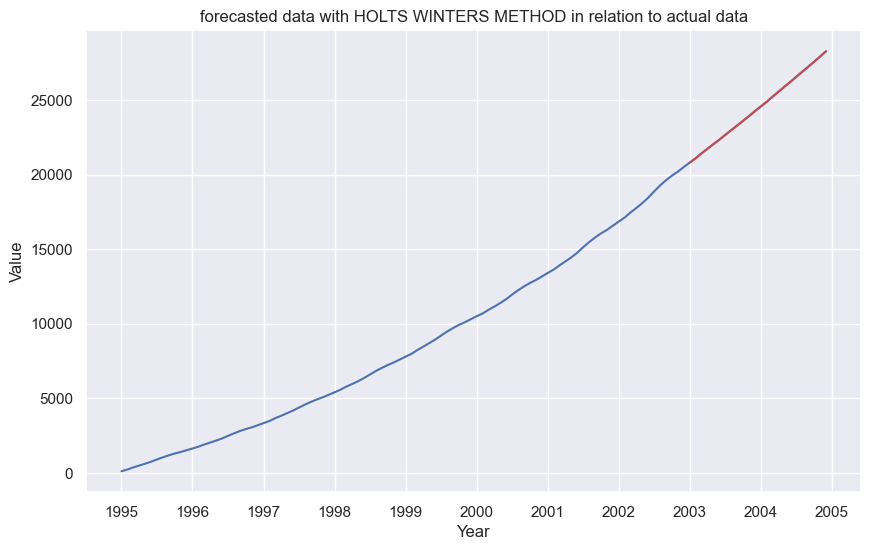

In [131]:
# create the line plot
sns.lineplot(data=forecast_passengers, x=forecast_passengers.index, y=forecast_passengers.values)

# select the data to be in a different color
pred= forecast_passengers.loc["2003-01-01":"2004-12-01"]
sns.lineplot(data=pred, x=pred.index, y=pred.values, color="r")

# set the title and labels
sns.set(rc={'figure.figsize':(10,6)})  # set the size of the plot
plt.title("forecasted data with HOLTS WINTERS METHOD in relation to actual data")
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()  # show the plot

# Building Time series forecasting with ARIMA

In [132]:
X = diff_passengers

In [133]:
size = int(len(X) * 0.66)

In [134]:
train, test = X[0:size], X[size:len(X)]

In [135]:
train

Date
1995-02-01     6.0
1995-03-01    14.0
1995-04-01    -3.0
1995-05-01    -8.0
1995-06-01    14.0
              ... 
1999-11-01   -31.0
1999-12-01    21.0
2000-01-01     3.0
2000-02-01   -16.0
2000-03-01    47.0
Name: Passengers, Length: 62, dtype: float64

In [136]:
test

Date
2000-04-01    -8.0
2000-05-01     7.0
2000-06-01    30.0
2000-07-01    38.0
2000-08-01    -9.0
2000-09-01   -34.0
2000-10-01   -30.0
2000-11-01   -26.0
2000-12-01    26.0
2001-01-01    13.0
2001-02-01    -9.0
2001-03-01    34.0
2001-04-01     2.0
2001-05-01     1.0
2001-06-01    45.0
2001-07-01    49.0
2001-08-01   -17.0
2001-09-01   -35.0
2001-10-01   -38.0
2001-11-01   -37.0
2001-12-01    41.0
2002-01-01     6.0
2002-02-01    -7.0
2002-03-01    40.0
2002-04-01    -4.0
2002-05-01     5.0
2002-06-01    56.0
2002-07-01    39.0
2002-08-01    -8.0
2002-09-01   -50.0
2002-10-01   -49.0
2002-11-01   -35.0
2002-12-01    35.0
Name: Passengers, dtype: float64

In [139]:
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                   62
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -267.991
Date:                Wed, 05 Apr 2023   AIC                            547.982
Time:                        13:59:41   BIC                            560.647
Sample:                    02-01-1995   HQIC                           552.945
                         - 03-01-2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5993      0.219     -2.731      0.006      -1.029      -0.169
ar.L2         -0.5519      0.180     -3.072      0.002      -0.904      -0.200
ar.L3         -0.3852      0.118     -3.257      0.0

# Evaluate the model using statistical measures such as AIC, BIC and RMSE

In [140]:
# Fit the ARIMA model
model = ARIMA(diff_passengers, order=(1, 1, 1))
model_fit = model.fit()

# Evaluate the model using AIC, BIC, and RMSE
print("AIC:", model_fit.aic)
print("BIC:", model_fit.bic)
print("RMSE:", np.sqrt(np.mean(model_fit.resid**2)))


AIC: 863.1799043722169
BIC: 870.809788719027
RMSE: 22.77407146581956


the RMSE is 22.77, which means that the average difference between the predicted and actual values is 22.77. A lower RMSE indicates a better fit of the model to the data.

Overall, these metrics suggest that the model is a good fit for the data, but there may be room for improvement.

In [141]:
#n is the number of months to be predicted
n=36
# Fit the ARIMA model
model = ARIMA(diff_passengers, order=(1,1,1))
model_fit = model.fit()

# Forecast future values
forecast_values = model_fit.predict(start=len(diff_passengers), end=len(diff_passengers)+n-1, typ='levels')
# Print the forecasted values
print(forecast_values)

2003-01-01    10.826615
2003-02-01     4.458019
2003-03-01     2.780182
2003-04-01     2.338148
2003-05-01     2.221692
2003-06-01     2.191011
2003-07-01     2.182928
2003-08-01     2.180798
2003-09-01     2.180237
2003-10-01     2.180089
2003-11-01     2.180051
2003-12-01     2.180040
2004-01-01     2.180038
2004-02-01     2.180037
2004-03-01     2.180037
2004-04-01     2.180037
2004-05-01     2.180037
2004-06-01     2.180037
2004-07-01     2.180037
2004-08-01     2.180037
2004-09-01     2.180037
2004-10-01     2.180037
2004-11-01     2.180037
2004-12-01     2.180037
2005-01-01     2.180037
2005-02-01     2.180037
2005-03-01     2.180037
2005-04-01     2.180037
2005-05-01     2.180037
2005-06-01     2.180037
2005-07-01     2.180037
2005-08-01     2.180037
2005-09-01     2.180037
2005-10-01     2.180037
2005-11-01     2.180037
2005-12-01     2.180037
Freq: MS, Name: predicted_mean, dtype: float64


                     .RESIDUAL PLOTS.  


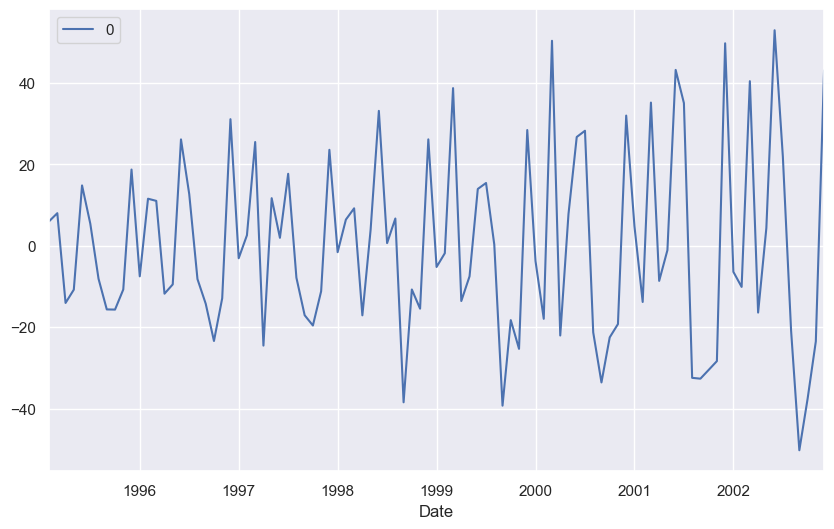

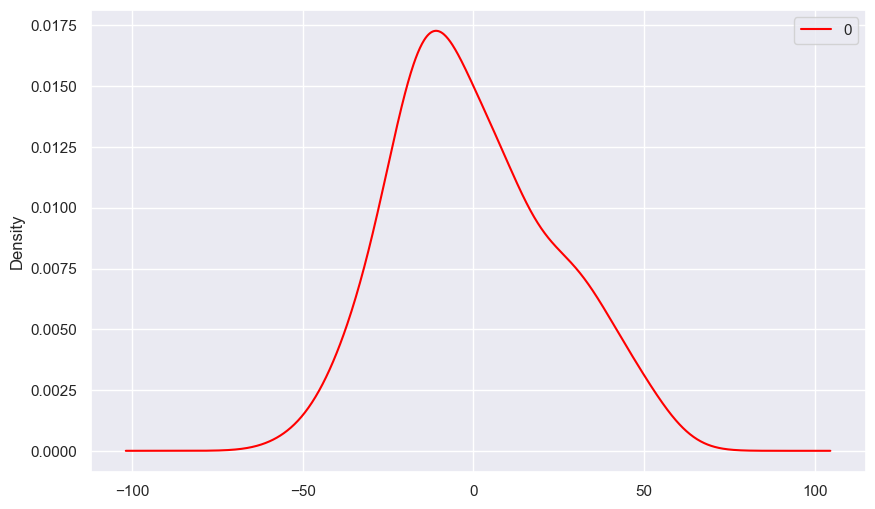

,0
count,95.000000
mean,-0.064379
std,22.894798
min,-50.239621
25%,-16.052199
50%,-3.749395
75%,14.379955
max,52.939794


In [142]:
print("                     .RESIDUAL PLOTS.  ")
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde',color='red')
plt.show()
residuals.describe()

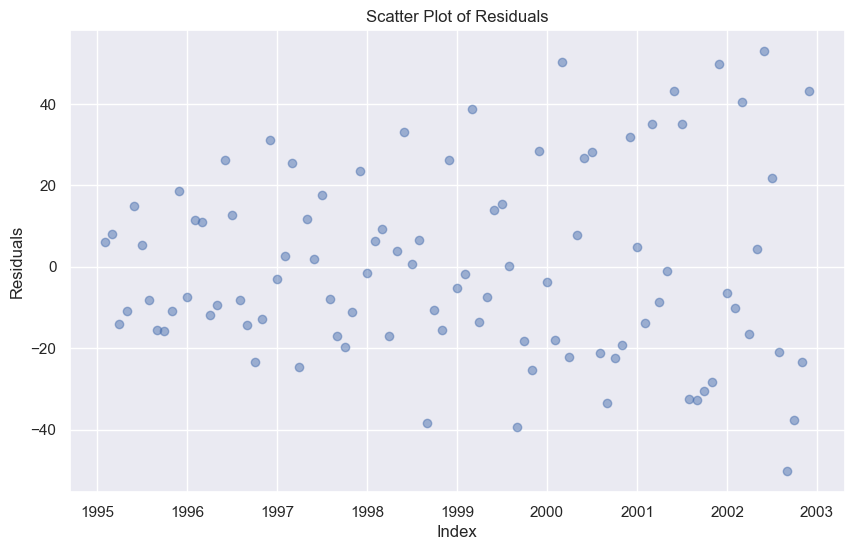

In [143]:
plt.scatter(residuals.index, residuals[0], alpha=0.5)
plt.title('Scatter Plot of Residuals')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()

In [144]:
forecast_passengers1 = pd.concat([passengers, forecast_values])
forecast_passengers1 = forecast_passengers.cumsum()

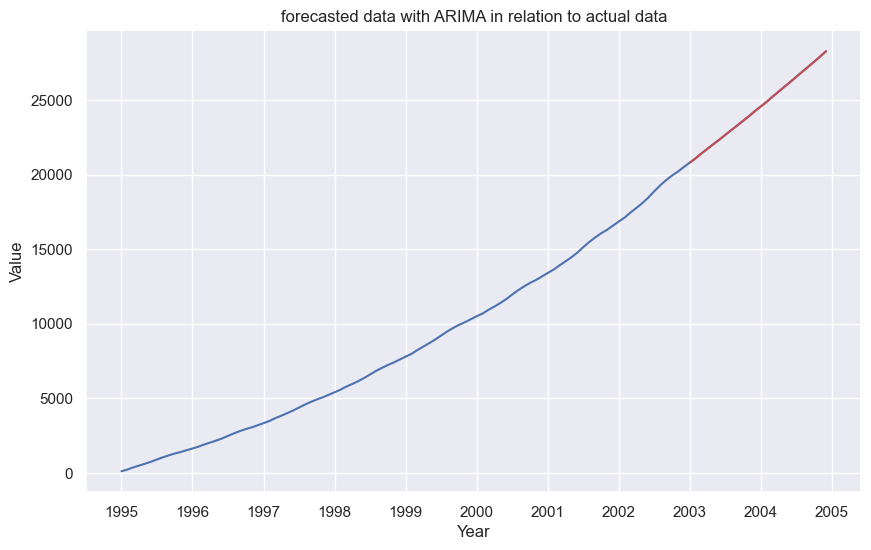

In [146]:
# create the line plot
sns.lineplot(data=forecast_passengers, x=forecast_passengers.index, y=forecast_passengers.values)

# select the data to be in a different color
pred= forecast_passengers.loc["2003-01-01":"2005-12-01"]
sns.lineplot(data=pred, x=pred.index, y=pred.values, color="r")

# set the title and labels
sns.set(rc={'figure.figsize':(10,6)})  # set the size of the plot
plt.title("forecasted data with ARIMA in relation to actual data")
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()  # show the plot

In [150]:
# Compute actual passenegrs values
forecasted_passengers = pd.concat([diff_passengers, forecast_values])
forecasted_passengers = forecasted_passengers.cumsum()


mae = mean_absolute_error(passengers[-n:], forecasted_passengers[-n:])
mse = mean_squared_error(passengers[-n:], forecasted_passengers[-n:])
rmse = np.sqrt(mse)

print('MAE: {:.2f}'.format(mae))
print('MSE: {:.2f}'.format(mse))
print('RMSE: {:.2f}'.format(rmse))

MAE: 42.49
MSE: 3175.18
RMSE: 56.35


In [155]:
forecast_passengers

1995-01-01      112.000000
1995-02-01      230.000000
1995-03-01      362.000000
1995-04-01      491.000000
1995-05-01      612.000000
                  ...     
2004-08-01    26905.671609
2004-09-01    27241.864273
2004-10-01    27577.837046
2004-11-01    27924.426537
2004-12-01    28276.858486
Length: 120, dtype: float64

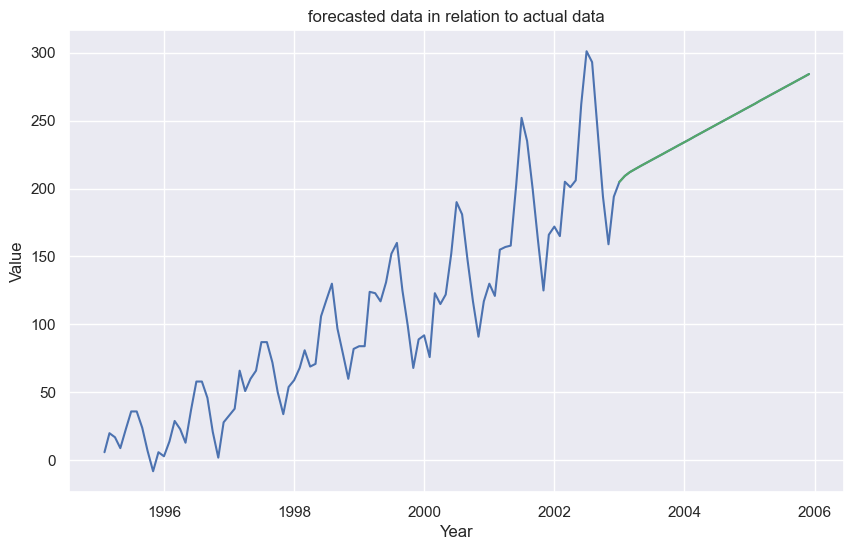

In [154]:
# create the line plot
sns.lineplot(data=forecasted_passengers, x=forecasted_passengers.index, y=forecasted_passengers.values)

# select the data to be in a different color
pred= forecasted_passengers.loc["2003-01-01":"2005-12-01"]
sns.lineplot(data=pred, x=pred.index, y=pred.values, color="g")

# set the title and labels
sns.set(rc={'figure.figsize':(10,6)})  # set the size of the plot
plt.title("forecasted data in relation to actual data")
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()  # show the plot


# MOVING AVERAGE OF FORCASTED DATA

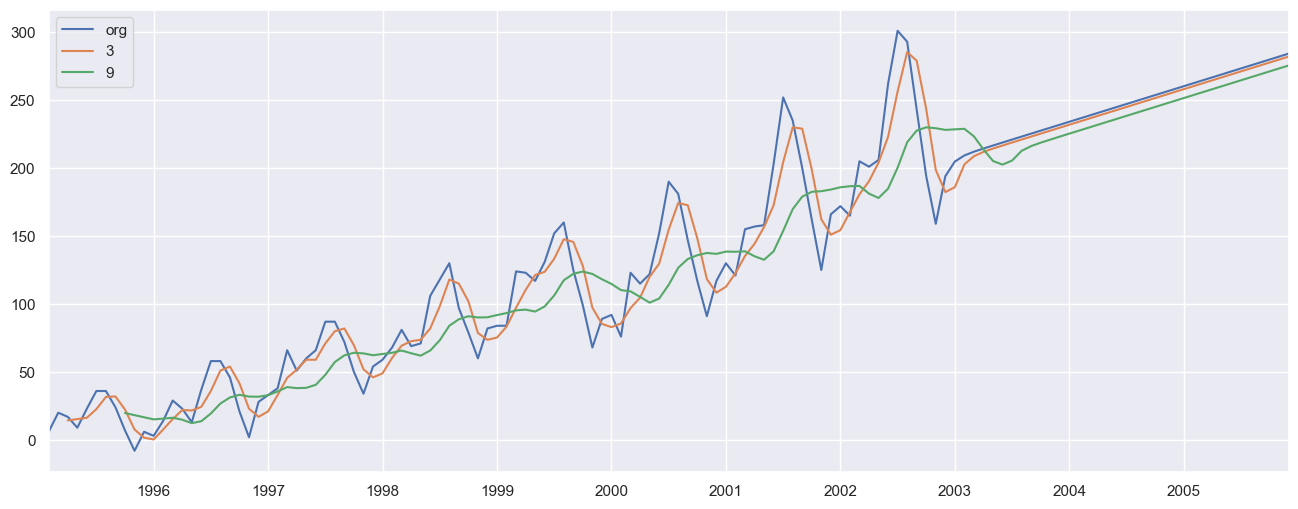

In [158]:
plt.figure(figsize=(16,6))
forecasted_passengers.plot(label="org")
for i in range(3,10,6):
    forecasted_passengers.rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

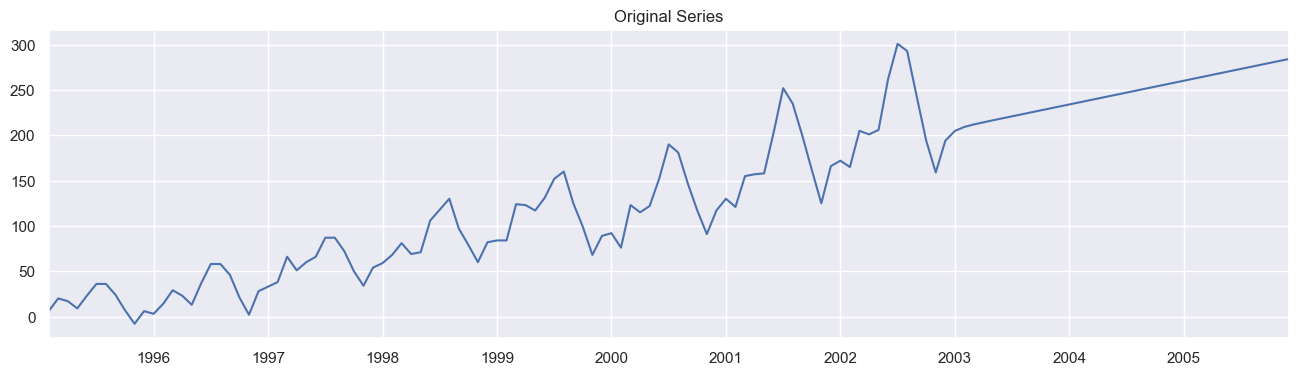

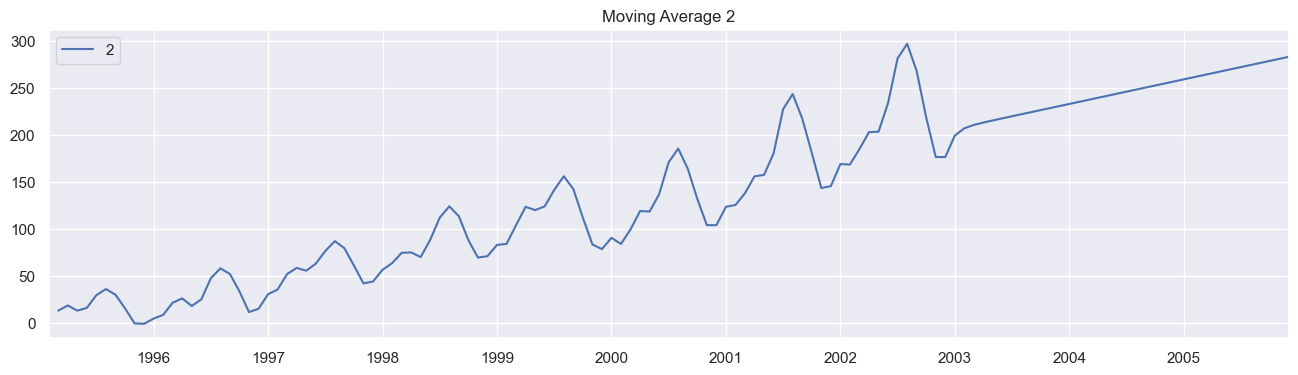

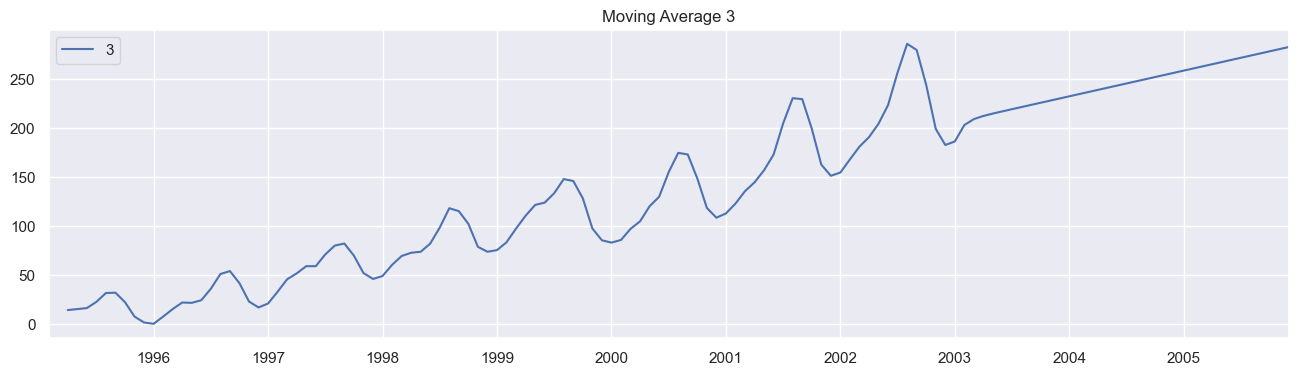

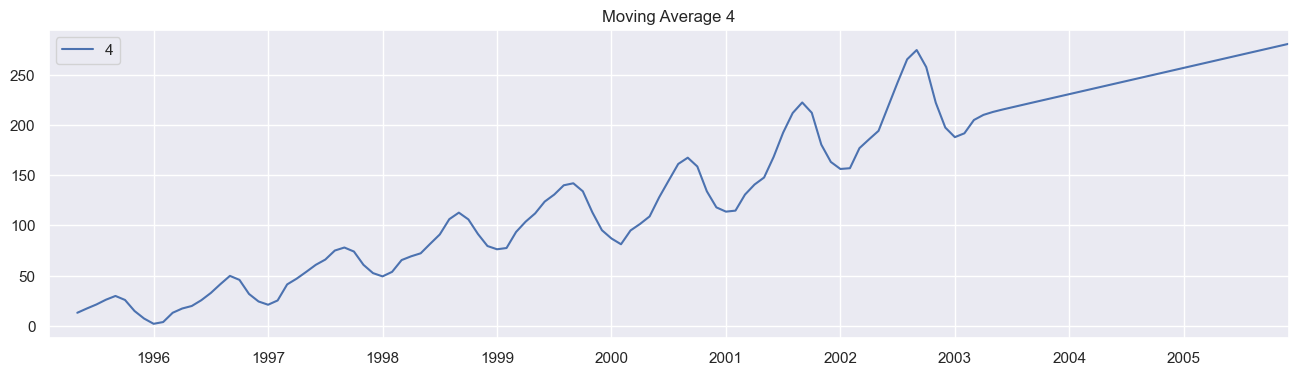

In [159]:
plt.figure(figsize=(16,4))
forecasted_passengers.plot(label="org")
plt.title("Original Series")
for i in range(2,5):
    plt.figure(figsize=(16,4))
    forecasted_passengers.rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average "+str(i))
    plt.legend(loc='best')
    plt.show()

# TIME SERIES DECOMPOSITION PLOT OF FORECASTED DATA

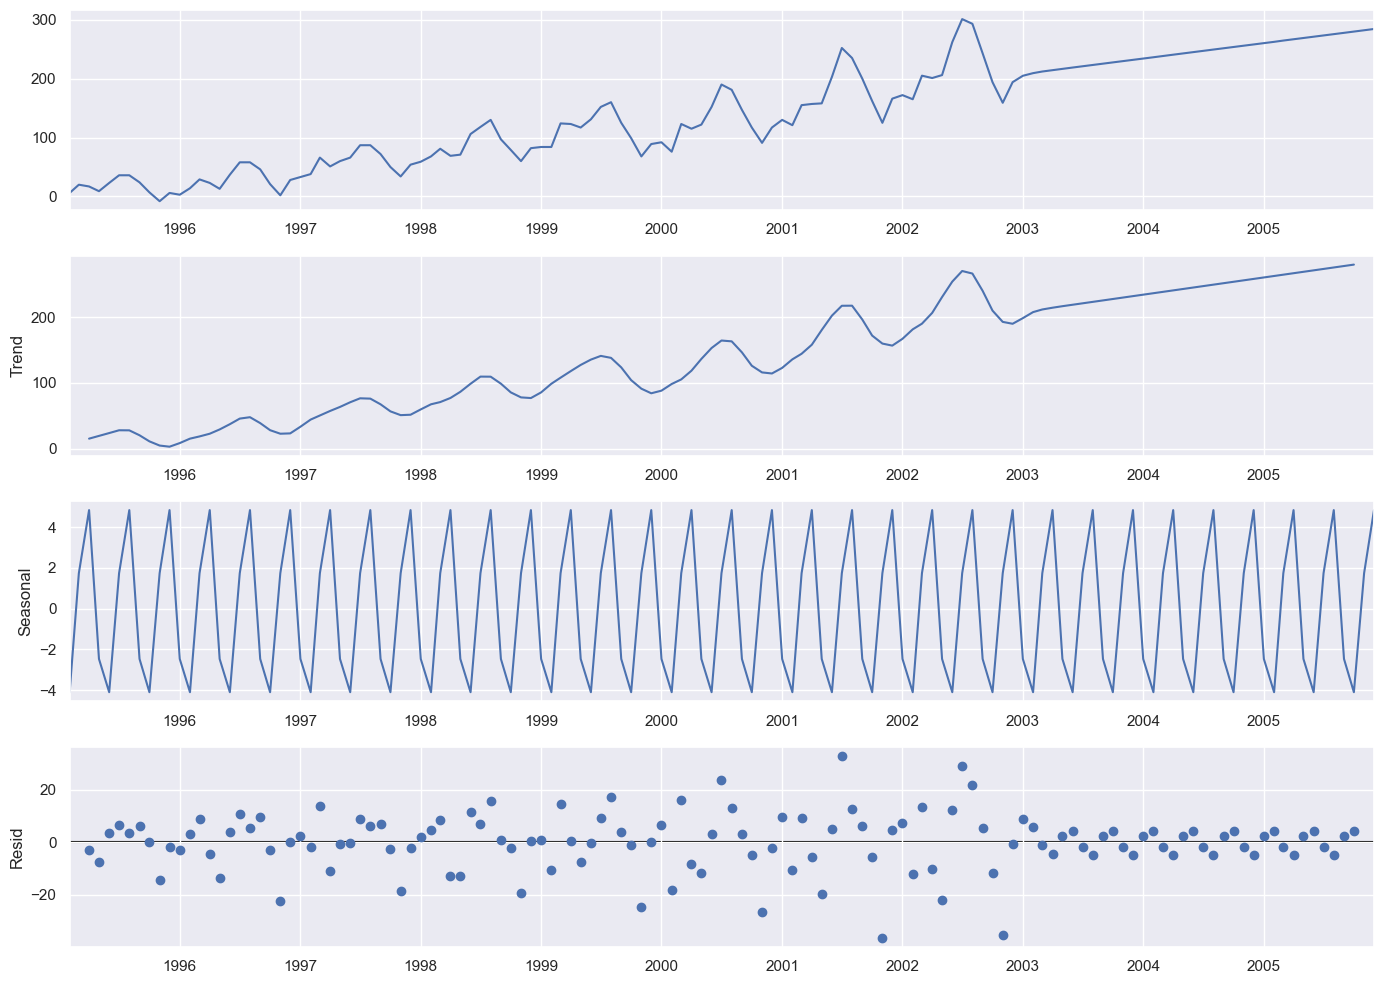

In [163]:
decompose_ts_add = seasonal_decompose(forecasted_passengers,period=4)
with plt.rc_context():
    plt.rc("figure", figsize=(14,10))
    decompose_ts_add.plot()
    plt.show()